In [ ]:
!rm -rf /content/sample_data
!pip install --upgrade --no-cache-dir gdown

#https://drive.google.com/file/d/1BGugZZgK-JCVgGkCekV7F3QKRMFRi3Ru/view?usp=sharing
!gdown https://drive.google.com/uc?id=1BGugZZgK-JCVgGkCekV7F3QKRMFRi3Ru

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From: https://drive.google.com/uc?id=1BGugZZgK-JCVgGkCekV7F3QKRMFRi3Ru
To: /content/survey.csv
100% 304k/304k [00:00<00:00, 17.7MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('/content/survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
df.shape

(1259, 27)

In [ ]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [ ]:
df.isna().mean() * 100

Timestamp                     0.000000
Age                           0.000000
Gender                        0.000000
Country                       0.000000
state                        40.905481
self_employed                 1.429706
family_history                0.000000
treatment                     0.000000
work_interfere               20.969023
no_employees                  0.000000
remote_work                   0.000000
tech_company                  0.000000
benefits                      0.000000
care_options                  0.000000
wellness_program              0.000000
seek_help                     0.000000
anonymity                     0.000000
leave                         0.000000
mental_health_consequence     0.000000
phys_health_consequence       0.000000
coworkers                     0.000000
supervisor                    0.000000
mental_health_interview       0.000000
phys_health_interview         0.000000
mental_vs_physical            0.000000
obs_consequence          

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [ ]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [ ]:
df = df[(df['Age'] > 0) & (df['Age'] <= 100)]
df = df.drop(columns=['Timestamp','Country','state'])
df.shape

(1254, 24)

In [ ]:
df.shape

(1254, 24)

In [ ]:
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
categorical_cols.remove('comments')
categorical_cols.remove('treatment')

In [ ]:
categorical_cols

['Gender',
 'self_employed',
 'family_history',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

In [ ]:
numerical_cols

['Age']

In [ ]:
df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [ ]:
df.isna().mean()[df.isna().mean() * 100 > 0]* 100

self_employed      1.435407
work_interfere    20.972887
comments          87.001595
dtype: float64

In [ ]:
df.dropna(subset=['self_employed', 'work_interfere'], inplace=True)
df['comments'].fillna('No comments', inplace=True)
df.isna().mean()[df.isna().mean() * 100 > 0]* 100

Series([], dtype: float64)

In [ ]:
df['treatment'].value_counts()

Yes    620
No     353
Name: treatment, dtype: int64

In [ ]:
X = df.drop(columns=['treatment'])
y = df[['treatment']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


In [ ]:
X_train.shape,X_test.shape

((778, 23), (195, 23))

In [ ]:
y_train.shape,y_test.shape

((778, 1), (195, 1))

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

column_transformer = make_column_transformer(
    (StandardScaler(), numerical_cols),
    (OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    (TfidfVectorizer(), 'comments')
)

X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

In [ ]:
X_train.shape,X_test.shape

((778, 1281), (195, 1281))

In [ ]:
!pip install scikit-plot

In [ ]:
label = y_test['treatment'].unique().tolist()

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, log_loss, classification_report
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

def evaluate_model(model, X_train, y_train, X_test, y_test, label, include_log_loss=True):
    print(f'Results for {model.__class__.__name__}:\n')

    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f'Training time (sec) = {train_time}')

    y_pred_train = model.predict(X_train)

    start_time = time.time()
    y_pred_test = model.predict(X_test)
    test_time = time.time() - start_time
    print(f'Prediction time (sec) = {test_time}')

    y_pred_prob_train = model.predict_proba(X_train) if hasattr(model, 'predict_proba') else None
    y_pred_prob_test = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    confusion_mat = confusion_matrix(y_test, y_pred_test)
    misclassified = np.sum(y_pred_test != y_test.values.ravel())
    acc_train = balanced_accuracy_score(y_train, y_pred_train)
    acc_test = balanced_accuracy_score(y_test, y_pred_test)

    loss_train, loss_test = None, None
    if include_log_loss and y_pred_prob_test is not None:
        loss_train = log_loss(y_train, y_pred_prob_train)
        loss_test = log_loss(y_test, y_pred_prob_test)

    print(f'\nTraining score = {acc_train}')
    print(f'Testing score = {acc_test}\n')

    for i, class_label in enumerate(label):
        err = np.sum(confusion_mat[i]) - confusion_mat[i][i]
        print(f'No of misclassified for class {class_label} (test data) = {err}')

    print(f'Total no of misclassified points (test data) = {misclassified}')
    print(f'Total % of misclassified points (test data) = {misclassified / len(y_test)}\n')

    if loss_train is not None and loss_test is not None:
        print(f'Training log_loss = {loss_train}')
        print(f'Testing log_loss = {loss_test}\n')

    print('Confusion matrix:')
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_test)
    plt.show()

    print('Classification report:\n')
    print(classification_report(y_test, y_pred_test))
    print('**************************************************************************')

    return [acc_train, acc_test, misclassified, misclassified / len(y_test), loss_train, loss_test, train_time, test_time]

Results for LogisticRegression:

Training time (sec) = 0.8844106197357178
Prediction time (sec) = 0.0018310546875

Training score = 0.8017759094028827
Testing score = 0.7634029986369832

No of misclassified for class Yes (test data) = 21
No of misclassified for class No (test data) = 22
Total no of misclassified points (test data) = 43
Total % of misclassified points (test data) = 0.2205128205128205

Training log_loss = 0.44305023322816023
Testing log_loss = 0.4678314183178994

Confusion matrix:


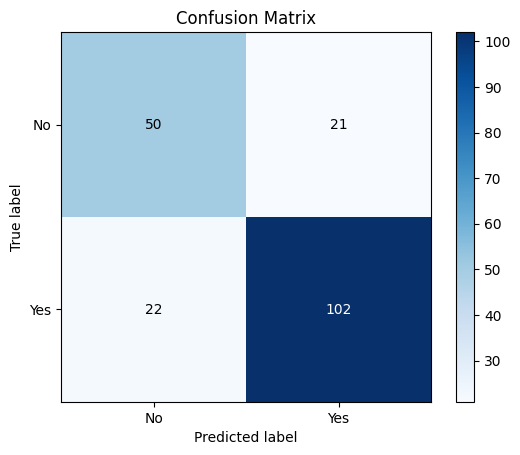

Classification report:

              precision    recall  f1-score   support

          No       0.69      0.70      0.70        71
         Yes       0.83      0.82      0.83       124

    accuracy                           0.78       195
   macro avg       0.76      0.76      0.76       195
weighted avg       0.78      0.78      0.78       195

**************************************************************************


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', n_jobs=-1)
LR_results = evaluate_model(lr, X_train, y_train, X_test, y_test, label)

Results for LinearSVC:

Training time (sec) = 0.07769608497619629
Prediction time (sec) = 0.00019693374633789062

Training score = 0.8166537977579502
Testing score = 0.7292139936392549

No of misclassified for class Yes (test data) = 27
No of misclassified for class No (test data) = 20
Total no of misclassified points (test data) = 47
Total % of misclassified points (test data) = 0.24102564102564103

Confusion matrix:


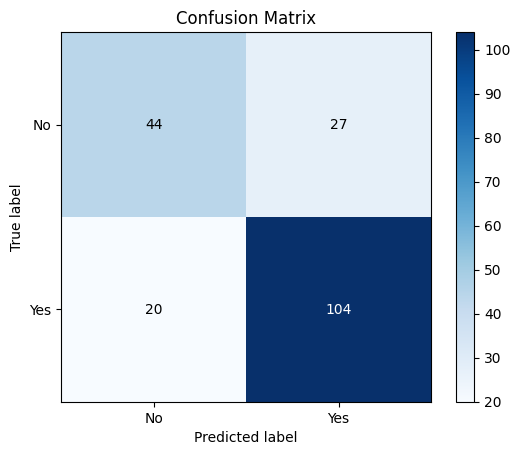

Classification report:

              precision    recall  f1-score   support

          No       0.69      0.62      0.65        71
         Yes       0.79      0.84      0.82       124

    accuracy                           0.76       195
   macro avg       0.74      0.73      0.73       195
weighted avg       0.76      0.76      0.76       195

**************************************************************************


In [ ]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(class_weight='balanced')
LSVC_results = evaluate_model(lsvc, X_train, y_train, X_test, y_test, label)

Results for DecisionTreeClassifier:

Training time (sec) = 0.03184795379638672
Prediction time (sec) = 0.0007636547088623047

Training score = 1.0
Testing score = 0.6869036801453885

No of misclassified for class Yes (test data) = 29
No of misclassified for class No (test data) = 27
Total no of misclassified points (test data) = 56
Total % of misclassified points (test data) = 0.28717948717948716

Training log_loss = 2.2204460492503136e-16
Testing log_loss = 10.350997896361848

Confusion matrix:


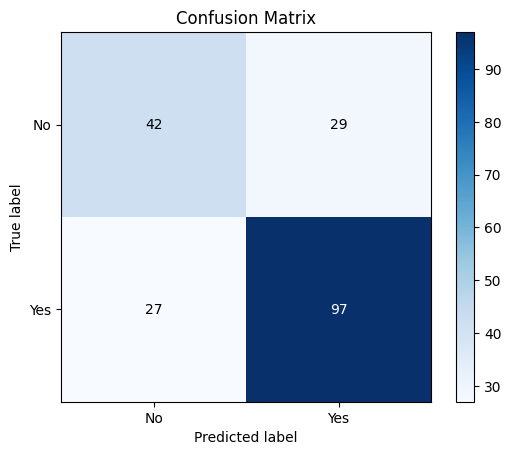

Classification report:

              precision    recall  f1-score   support

          No       0.61      0.59      0.60        71
         Yes       0.77      0.78      0.78       124

    accuracy                           0.71       195
   macro avg       0.69      0.69      0.69       195
weighted avg       0.71      0.71      0.71       195

**************************************************************************


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced')
DTC_results = evaluate_model(dtc, X_train, y_train, X_test, y_test, label)

Results for ExtraTreesClassifier:

Training time (sec) = 0.6635963916778564
Prediction time (sec) = 0.011885643005371094

Training score = 1.0
Testing score = 0.6689004997728305

No of misclassified for class Yes (test data) = 39
No of misclassified for class No (test data) = 14
Total no of misclassified points (test data) = 53
Total % of misclassified points (test data) = 0.2717948717948718

Training log_loss = 2.2204460492503136e-16
Testing log_loss = 0.5049909807989043

Confusion matrix:


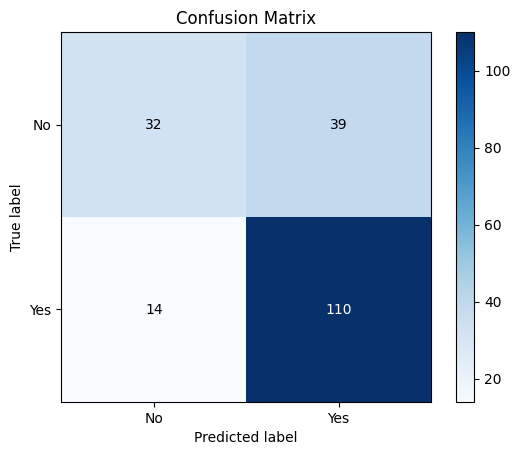

Classification report:

              precision    recall  f1-score   support

          No       0.70      0.45      0.55        71
         Yes       0.74      0.89      0.81       124

    accuracy                           0.73       195
   macro avg       0.72      0.67      0.68       195
weighted avg       0.72      0.73      0.71       195

**************************************************************************


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(class_weight='balanced')
ETC_results = evaluate_model(etc, X_train, y_train, X_test, y_test, label)

Results for RandomForestClassifier:

Training time (sec) = 0.500586986541748
Prediction time (sec) = 0.009446144104003906

Training score = 1.0
Testing score = 0.6809972739663789

No of misclassified for class Yes (test data) = 39
No of misclassified for class No (test data) = 11
Total no of misclassified points (test data) = 50
Total % of misclassified points (test data) = 0.2564102564102564

Training log_loss = 0.14286396176970145
Testing log_loss = 0.49724876499837684

Confusion matrix:


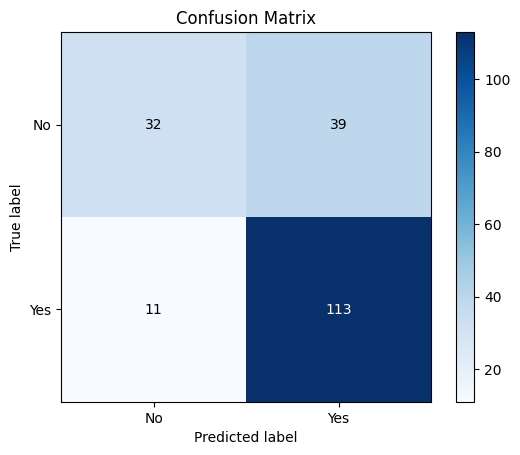

Classification report:

              precision    recall  f1-score   support

          No       0.74      0.45      0.56        71
         Yes       0.74      0.91      0.82       124

    accuracy                           0.74       195
   macro avg       0.74      0.68      0.69       195
weighted avg       0.74      0.74      0.73       195

**************************************************************************


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
RFC_results = evaluate_model(rfc, X_train, y_train, X_test, y_test, label)

In [ ]:
s1=[LR_results,LSVC_results,DTC_results,ETC_results,RFC_results]
s2=['LR','LSVC','DTC','ETC','RFC']
col=['Train score','Test score','Missclassified-point','% missclasification','Train log-loss','Test log-loss','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time
0,LR,0.801776,0.763403,43,0.220513,4.430502e-01,0.467831,0.884411,0.001831
1,LSVC,0.816654,0.729214,47,0.241026,NaN,NaN,0.077696,0.000197
2,DTC,1.000000,0.686904,56,0.287179,2.220446e-16,10.350998,0.031848,0.000764
3,ETC,1.000000,0.668900,53,0.271795,2.220446e-16,0.504991,0.663596,0.011886
4,RFC,1.000000,0.680997,50,0.256410,1.428640e-01,0.497249,0.500587,0.009446


In [ ]:
column_transformer

ColumnTransformer(transformers=[('standardscaler', StandardScaler(), ['Age']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Gender', 'self_employed', 'family_history',
                                  'work_interfere', 'no_employees',
                                  'remote_work', 'tech_company', 'benefits',
                                  'care_options', 'wellness_program',
                                  'seek_help', 'anonymity', 'leave',
                                  'mental_health_consequence',
                                  'phys_health_consequence', 'coworkers',
                                  'supervisor', 'mental_health_interview',
                                  'phys_health_interview', 'mental_vs_physical',
                                  'obs_consequence']),
                                ('tfidfvectorizer', TfidfVectorizer(),
                                 'comments')])

In [ ]:
lr

LogisticRegression(class_weight='balanced', n_jobs=-1)

In [ ]:
from sklearn.pipeline import make_pipeline
import joblib
pipeline = make_pipeline(column_transformer, lr)
joblib.dump(pipeline, 'lr_pipeline.joblib')

['lr_pipeline.joblib']

In [ ]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
18,46,Male,Yes,Yes,No,Sometimes,1-5,Yes,Yes,Yes,...,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes,No comments
20,29,Male,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,...,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No,No comments
21,31,Male,Yes,No,No,Never,1-5,Yes,Yes,No,...,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No,No comments
22,46,Male,No,No,Yes,Often,26-100,Yes,Yes,Yes,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No,No comments
23,41,Male,No,No,Yes,Never,More than 1000,No,No,Don't know,...,Don't know,Maybe,No,No,No,No,Yes,Don't know,No,No comments


In [ ]:
df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [ ]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

In [ ]:
numerical_cols

['Age']

In [ ]:
categorical_cols

['Gender',
 'self_employed',
 'family_history',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'comments']

In [ ]:
d = {}
for cat_col in categorical_cols:
    if cat_col != 'comments':
        d[cat_col] = X[cat_col].unique().tolist()
d

{'Gender': ['Male', 'Female', 'Other'],
 'self_employed': ['Yes', 'No'],
 'family_history': ['Yes', 'No'],
 'work_interfere': ['Sometimes', 'Never', 'Often', 'Rarely'],
 'no_employees': ['1-5',
  '100-500',
  '26-100',
  'More than 1000',
  '6-25',
  '500-1000'],
 'remote_work': ['Yes', 'No'],
 'tech_company': ['Yes', 'No'],
 'benefits': ['Yes', 'No', "Don't know"],
 'care_options': ['Not sure', 'Yes', 'No'],
 'wellness_program': ['Yes', 'No', "Don't know"],
 'seek_help': ["Don't know", 'No', 'Yes'],
 'anonymity': ['Yes', 'No', "Don't know"],
 'leave': ['Very easy',
  'Somewhat difficult',
  "Don't know",
  'Very difficult',
  'Somewhat easy'],
 'mental_health_consequence': ['No', 'Maybe', 'Yes'],
 'phys_health_consequence': ['No', 'Maybe', 'Yes'],
 'coworkers': ['Yes', 'Some of them', 'No'],
 'supervisor': ['Yes', 'Some of them', 'No'],
 'mental_health_interview': ['No', 'Maybe', 'Yes'],
 'phys_health_interview': ['Yes', 'No', 'Maybe'],
 'mental_vs_physical': ['Yes', 'No', "Don't know

In [ ]:
import json
with open('categorical_values.json', 'w') as f:
    json.dump(d, f)

In [ ]:
d.keys()

dict_keys(['Gender', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence'])

In [ ]:
column_questions = {
    'Age': 'what is your age?',
    'Gender': 'What is your gender?',
    'self_employed': 'Are you self-employed?',
    'family_history': 'Do you have a family history of mental illness?',
    'work_interfere': 'How often does work interfere with your mental health?',
    'no_employees': 'How many employees does your company or organization have?',
    'remote_work': 'Do you work remotely?',
    'tech_company': 'Is your company in the tech industry?',
    'benefits': 'Does your employer provide mental health benefits?',
    'care_options': 'Do you know the options for mental health care your employer provides?',
    'wellness_program': 'Is there a mental health wellness program at your workplace?',
    'seek_help': 'How easy is it for you to seek help for mental health issues at your workplace?',
    'anonymity': 'Do you feel that your anonymity is protected when you discuss mental health issues with your employer?',
    'leave': 'How easy is it for you to take medical leave for a mental health condition?',
    'mental_health_consequence': 'Do you think that discussing a mental health issue with your employer would have negative consequences?',
    'phys_health_consequence': 'Do you think that discussing a physical health issue with your employer would have negative consequences?',
    'coworkers': 'Would you be willing to discuss a mental health issue with your coworkers?',
    'supervisor': 'Would you be willing to discuss a mental health issue with your direct supervisor(s)?',
    'mental_health_interview': 'Have you ever been asked about your mental health in a job interview?',
    'phys_health_interview': 'Have you ever been asked about your physical health in a job interview?',
    'mental_vs_physical': 'Do you feel that your employer takes mental health as seriously as physical health?',
    'obs_consequence': 'Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?',
    'comments': 'Any comments'
}

column_questions = {j:i for i,j in column_questions.items()}
column_questions

{'what is your age?': 'Age',
 'What is your gender?': 'Gender',
 'Are you self-employed?': 'self_employed',
 'Do you have a family history of mental illness?': 'family_history',
 'How often does work interfere with your mental health?': 'work_interfere',
 'How many employees does your company or organization have?': 'no_employees',
 'Do you work remotely?': 'remote_work',
 'Is your company in the tech industry?': 'tech_company',
 'Does your employer provide mental health benefits?': 'benefits',
 'Do you know the options for mental health care your employer provides?': 'care_options',
 'Is there a mental health wellness program at your workplace?': 'wellness_program',
 'How easy is it for you to seek help for mental health issues at your workplace?': 'seek_help',
 'Do you feel that your anonymity is protected when you discuss mental health issues with your employer?': 'anonymity',
 'How easy is it for you to take medical leave for a mental health condition?': 'leave',
 'Do you think tha